In [17]:
from modules import *
import xarray as xr
seaice = w3.load_data(['seaice'],projection='SouthPolarStereo', temporal_resolution='annual',temporal_decomposition='anomalous',detrend='raw')['seaice'].dropna(dim='time')
area = xr.open_dataset('data/area_files/processed_nsidc.nc').area

In [18]:
seaice

<xarray.DataArray 'seaice' (x: 316, y: 332, time: 40)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1980-01-01 ... 2018-01-01
  * x        (x) int32 -3950000 -3925000 -3900000 ... 3875000 3900000 3925000
  * y        (y) int32 4350000 4325000 4300000 ... -3875000 -3900000 -3925000

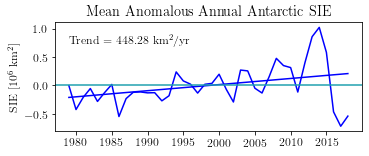

In [66]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.style.use('stylesheets/timeseries.mplstyle')
timeseries = (seaice*area).sum(dim=('x', 'y'))/1e6

m, b = timeseries.polyfit(dim='time', deg=1).polyfit_coefficients
yfit = m*seaice.time.astype(np.float64) +b


plt.figure()
plt.plot(seaice.time, timeseries,color='blue')
plt.plot(seaice.time, yfit, color='blue')
plt.text(seaice.time.min().values,0.75, f'Trend = {m.values*365.25*60*60*1e15:.2f} km$^2$/yr')
plt.title('Mean Anomalous Annual Antarctic SIE')
plt.axhline(0)
plt.ylabel('SIE [10$^6$ km$^2$]')
plt.savefig('seaice_timeseries.pdf')
plt.show()

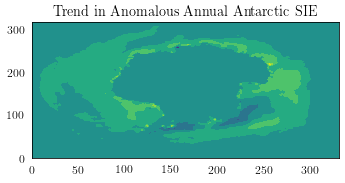

In [71]:
mpl.style.use('stylesheets/contour.mplstyle')

m, b = seaice.polyfit(dim='time', deg=1).polyfit_coefficients


plt.figure()
plt.contourf(m)
plt.title('Trend in Anomalous Annual Antarctic SIE')
plt.savefig('seaice_contour.pdf')
plt.show()